In [1]:
from read_pics import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from sklearn.multioutput import MultiOutputClassifier

Ouverture du fichier de pics ../data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802
Ouverture du fichier de pics ../data/pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701
Ouverture du fichier de pics ../data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102


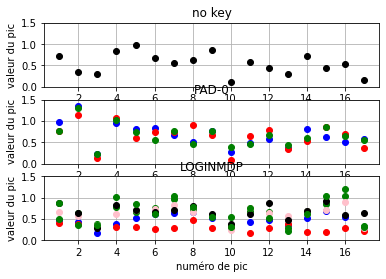

In [2]:
pics_nokey, info1 = get_pics_from_file("../data/pics_NOKEY.bin")
pics_pad0, info2 = get_pics_from_file("../data/pics_0.bin")

pics_LOGINMDP, info3 = get_pics_from_file("../data/pics_LOGINMDP.bin")

######### Pics ############
# NO KEY
plt.figure(1)
plt.subplot(311)
plt.plot(range(1,info1["nb_pics"]+1), pics_nokey[0], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('no key')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')

# PAD-0
plt.subplot(312)
plt.plot(range(1,info2["nb_pics"]+1), pics_pad0[0], 'ko',color='blue')
plt.plot(range(1,info2["nb_pics"]+1), pics_pad0[1], 'ko',color='red')
plt.plot(range(1,info2["nb_pics"]+1), pics_pad0[2], 'ko',color='green')


plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('PAD-0')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')

# LOGINMDP
plt.subplot(313)
# plt.plot(range(1,info3["nb_pics"]+1), pics_LOGINMDP[0], 'ko')
plt.plot(range(1,info2["nb_pics"]+1), pics_LOGINMDP[0], 'ko',color='blue')
plt.plot(range(1,info2["nb_pics"]+1), pics_LOGINMDP[1], 'ko',color='red')
plt.plot(range(1,info2["nb_pics"]+1), pics_LOGINMDP[2], 'ko',color='green')
plt.plot(range(1,info2["nb_pics"]+1), pics_LOGINMDP[3], 'ko',color='pink')
plt.plot(range(1,info2["nb_pics"]+1), pics_LOGINMDP[4], 'ko',color='black')
plt.plot(range(1,info2["nb_pics"]+1), pics_LOGINMDP[5], 'ko',color='green')


plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('LOGINMDP')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')




plt.show()


# CONSIDERATION GENERALES

Signal du NOKEY: On a deux options: 

* Soit on le considère comme un bruit et on le retire à chaque fois des caractéristiques des distributions


* Soit on le garde et on considère que le password est tapé comme Ctrl+Alt+Suppr + nokey + lettre + nokey + lettre + nokey + lettre ... 

Il faut que dans l'output, on ait des probas élevées sur les touches suivantes: Ctrl , Suppr, Entrée car on sait que ce sont des touches sur lesquelles on a appuyé.



- montrer la proximité des distributions à partir de la position du clavier



# Liste des fichiers à utiliser

In [3]:
from os.path import isfile, join
from os import listdir

mypath=r'C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\'
filenames = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
filenames.remove("C:\\Users\\julie\\Documents\\MasterBGD_Python\\zz_hackaton_armée\\challenge1\\Hackaton\\data\\\\pics_LOGINMDP.bin")

# Fonction de display boxplot des inputs


In [4]:
def boxplot_touche(df):
    output=pd.DataFrame(df)
    output = output.unstack(level=-1)
    output = pd.DataFrame(output)
    output.reset_index(inplace=True)
    output.columns = ['pic','index_pic','amplitude']
    
    plt.figure(figsize=(15,10))
    sns.boxplot(x=output['pic'], y=output['amplitude'])
    plt.show()


# Affichage des signaux de toutes les touches 

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701


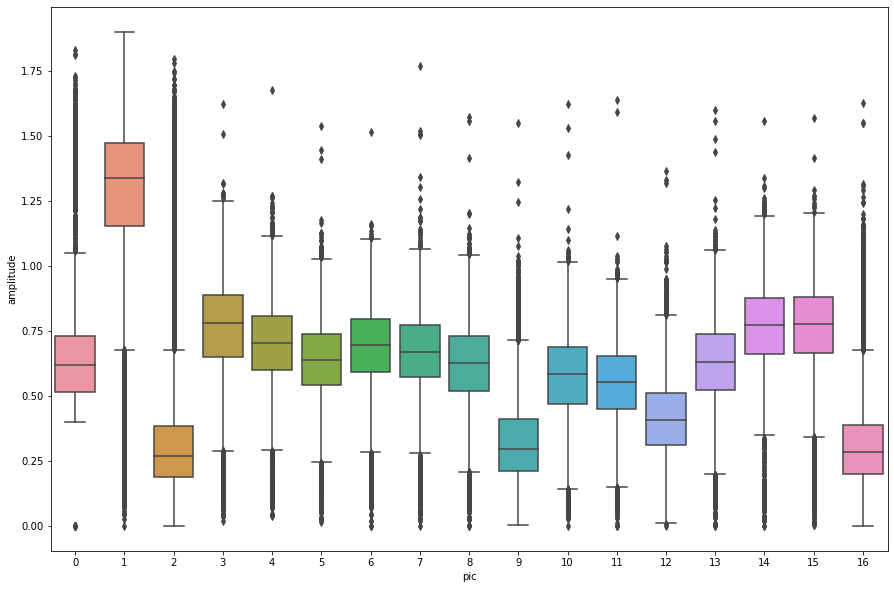

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_1.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8390


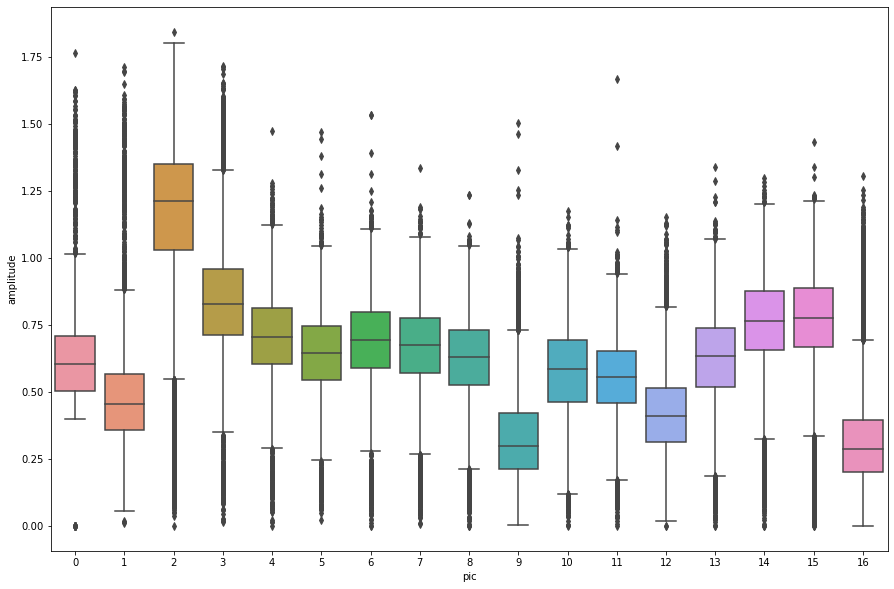

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_2.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8367


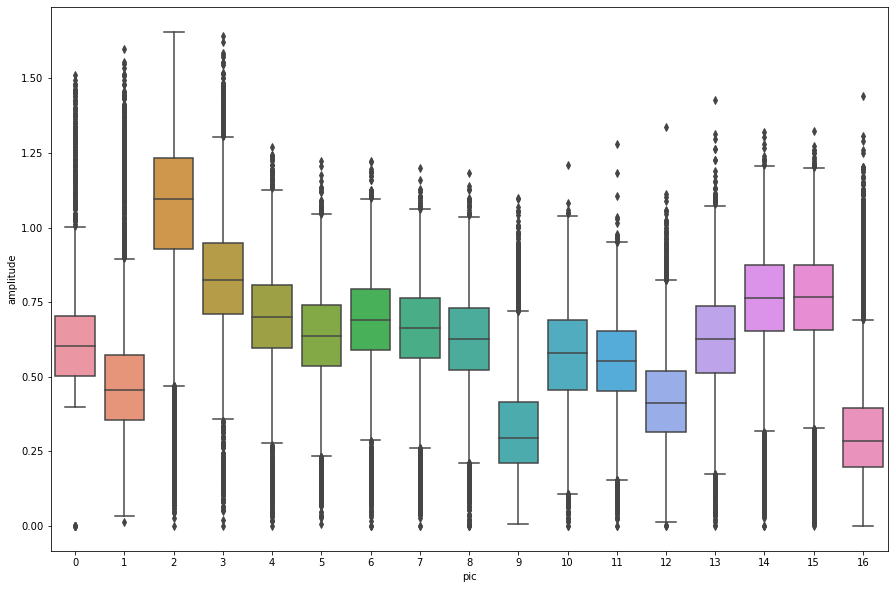

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_3.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8112


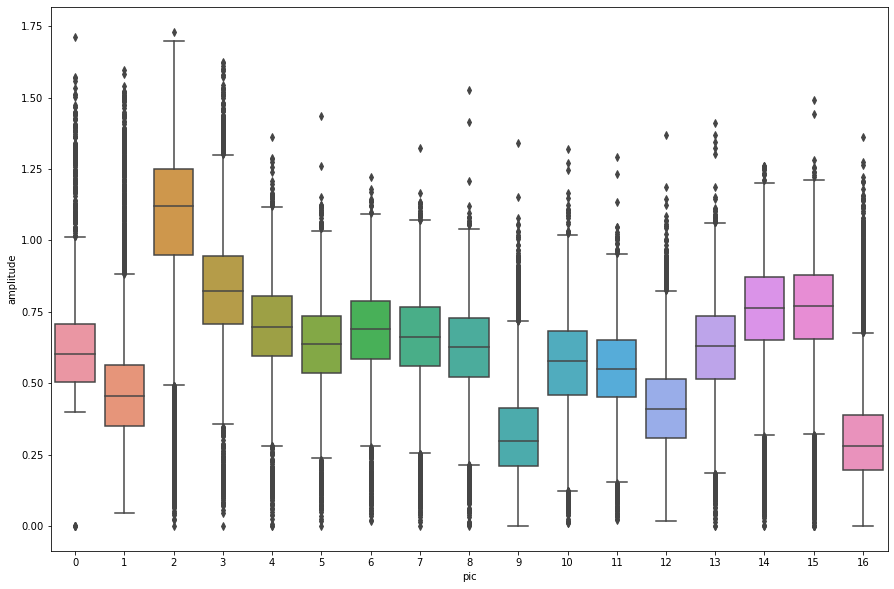

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_4.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 10857


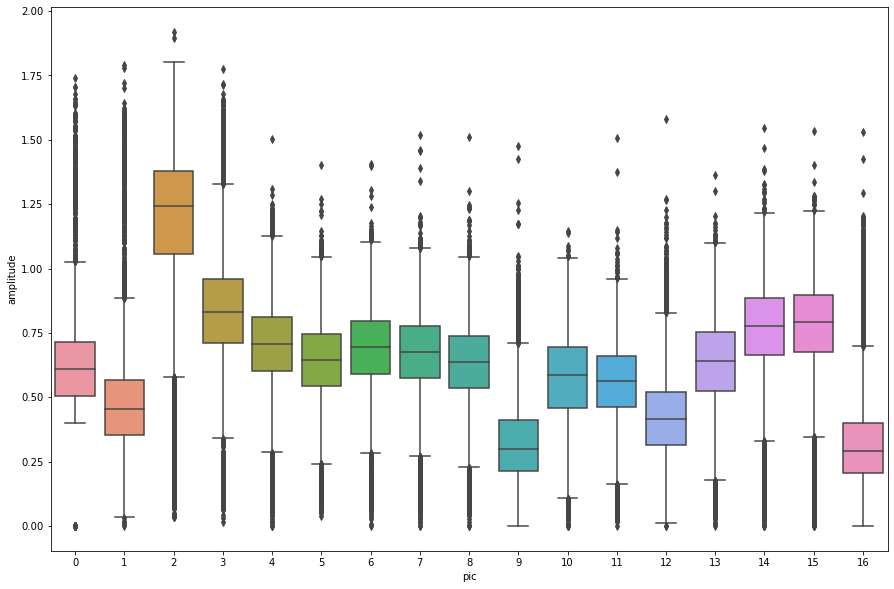

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_5.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8380


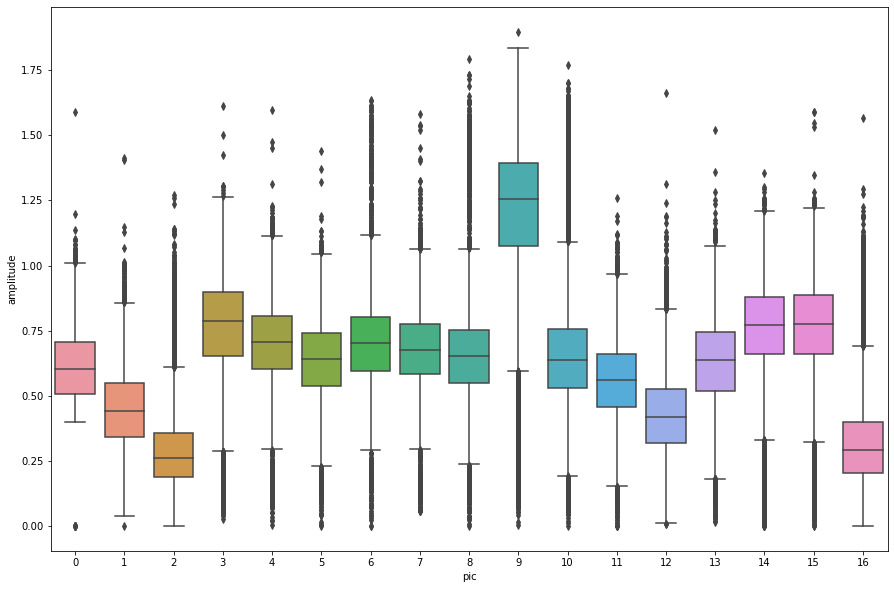

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_6.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7771


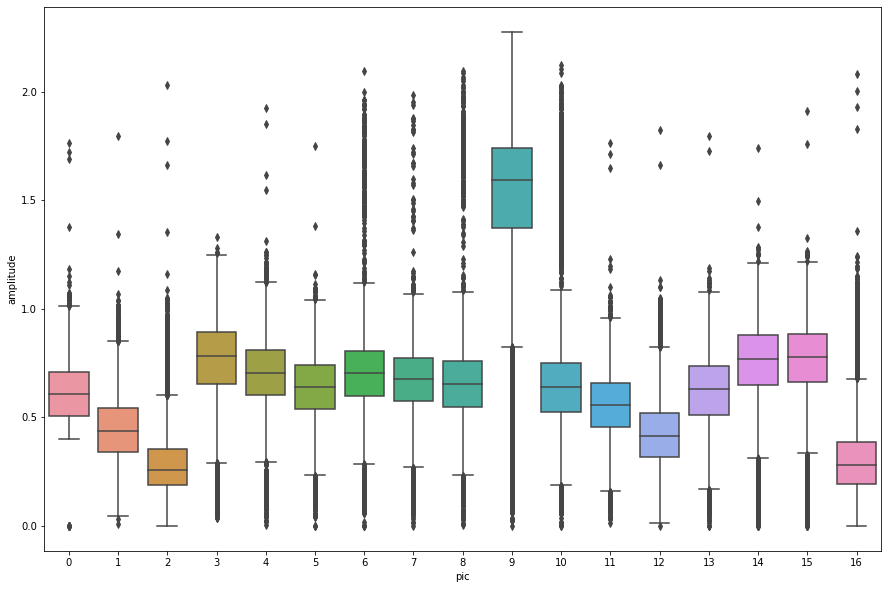

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_7.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8318


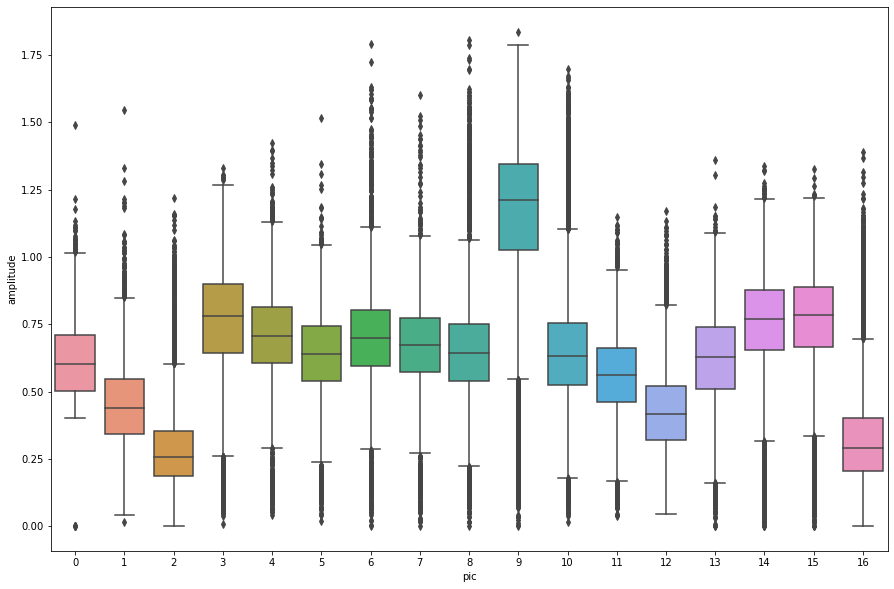

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_8.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8134


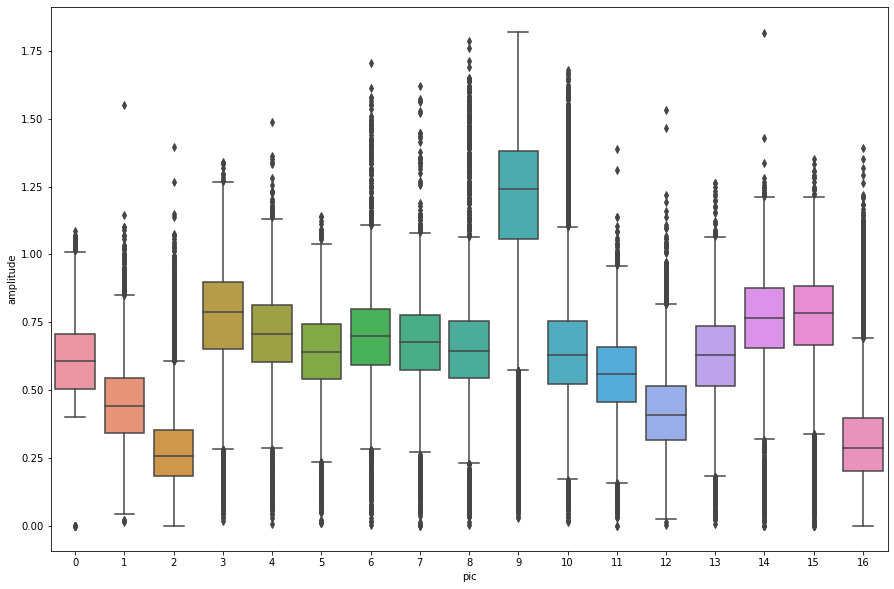

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_9.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8047


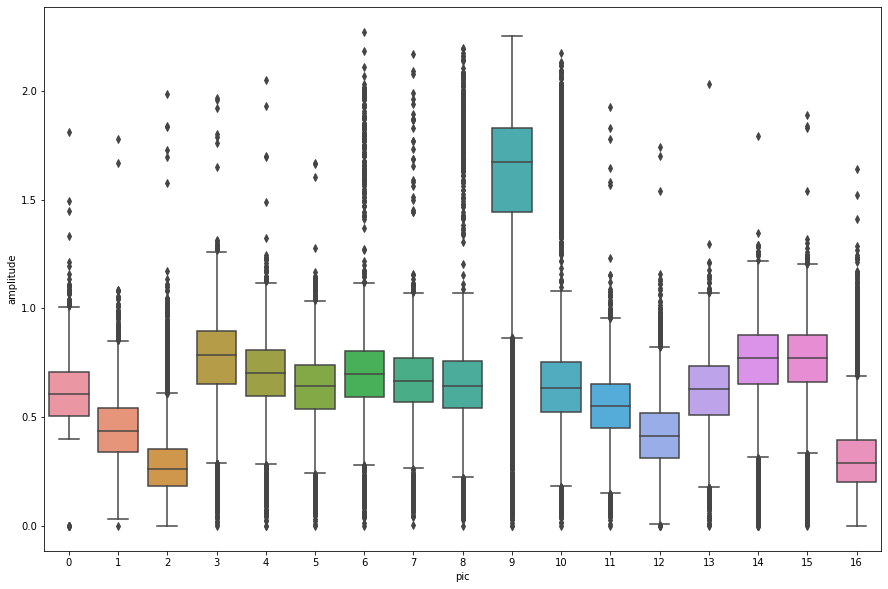

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_A.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7610


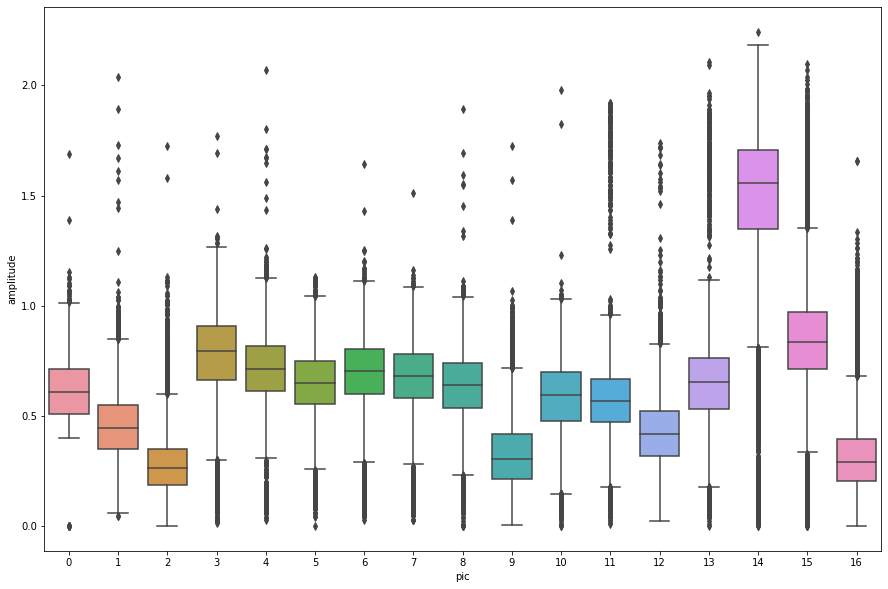

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_B.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7640


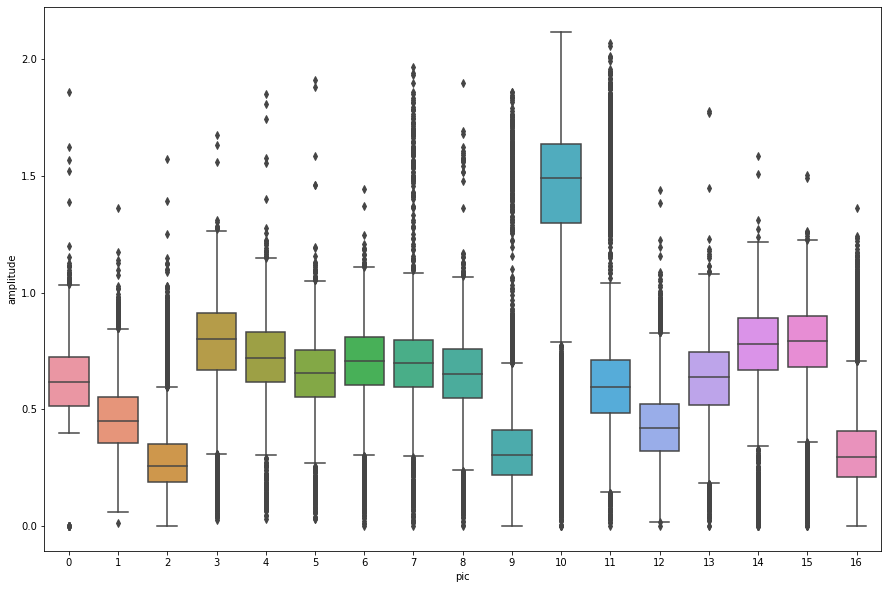

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_C.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7777


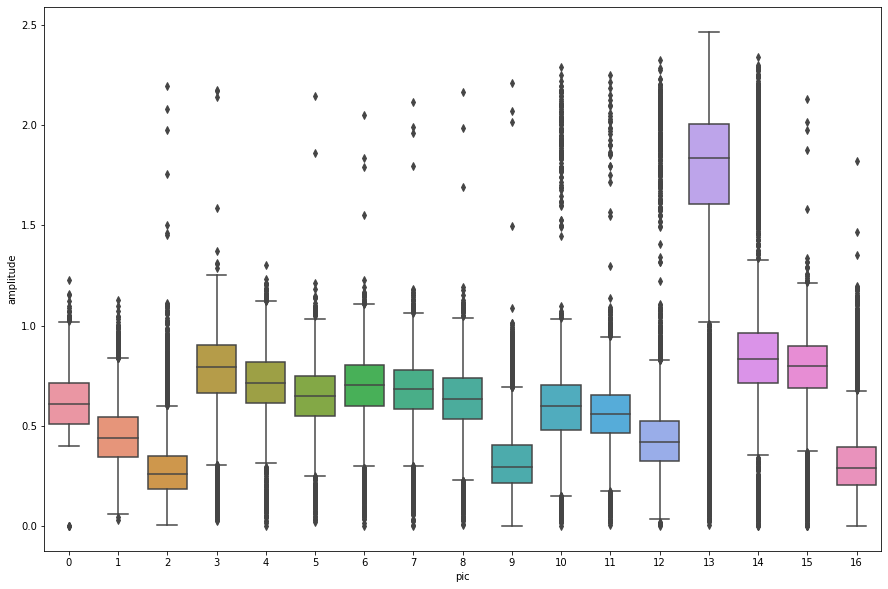

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_CTRL.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 10069


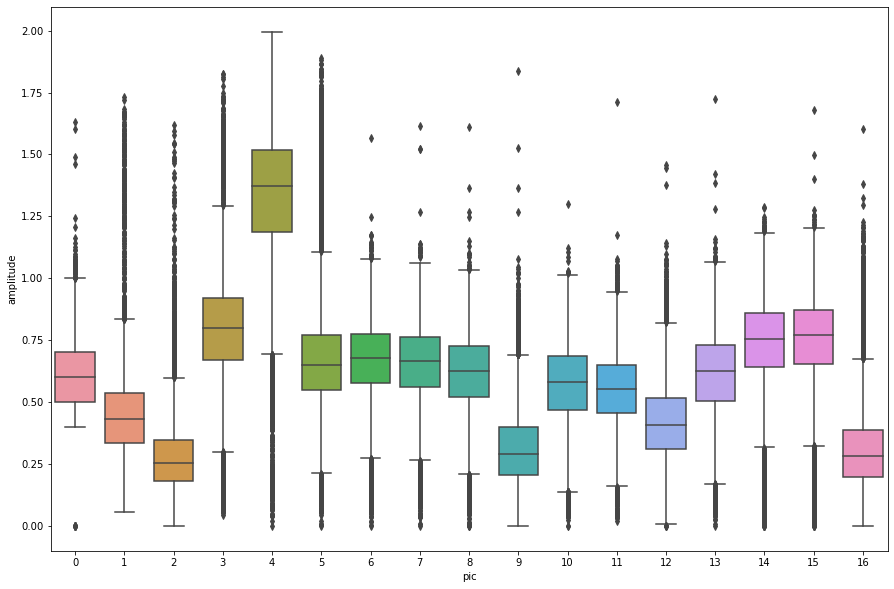

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_D.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7847


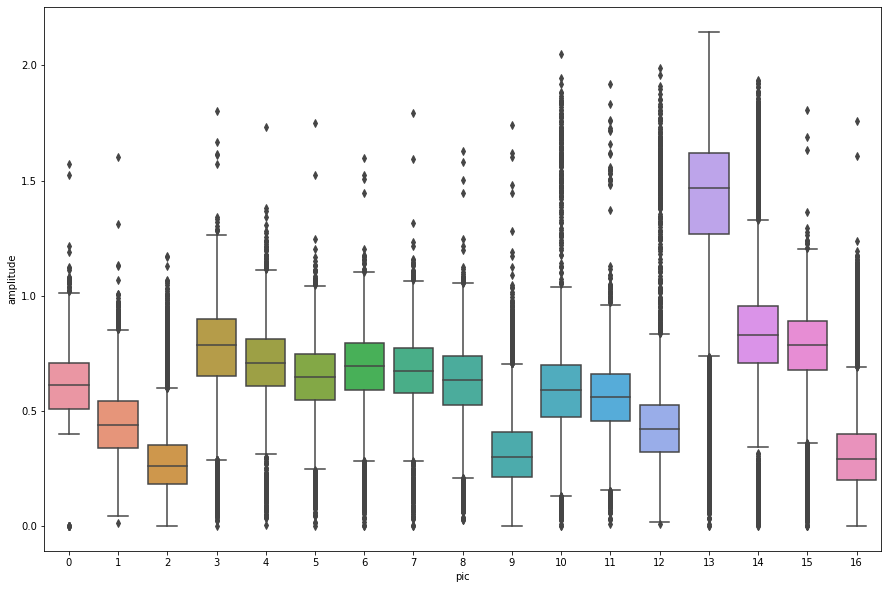

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_E.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7927


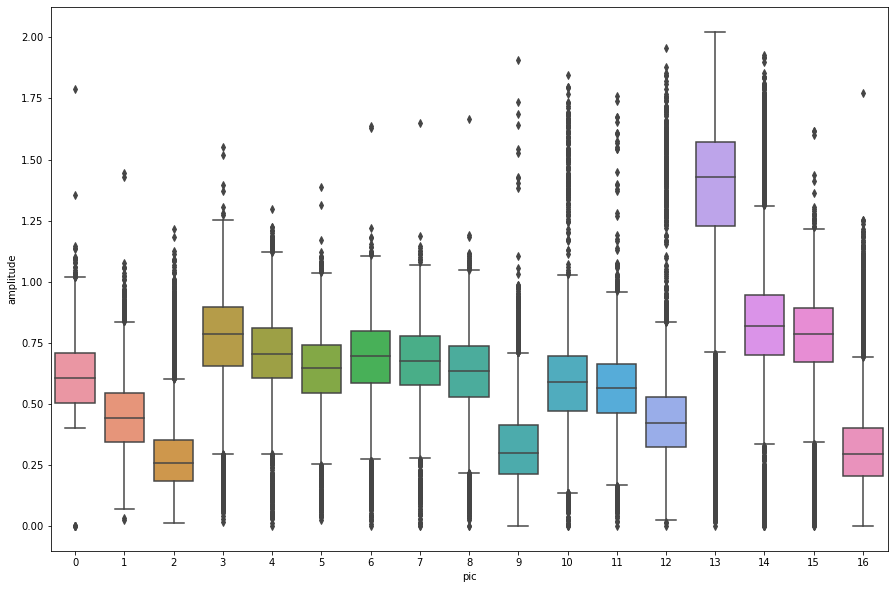

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_ENTER.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 13411


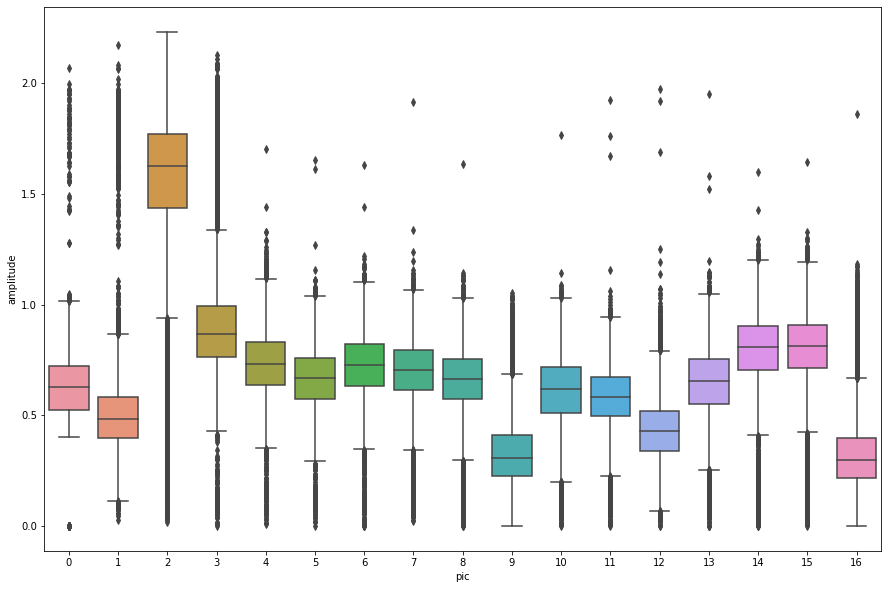

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_F.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7734


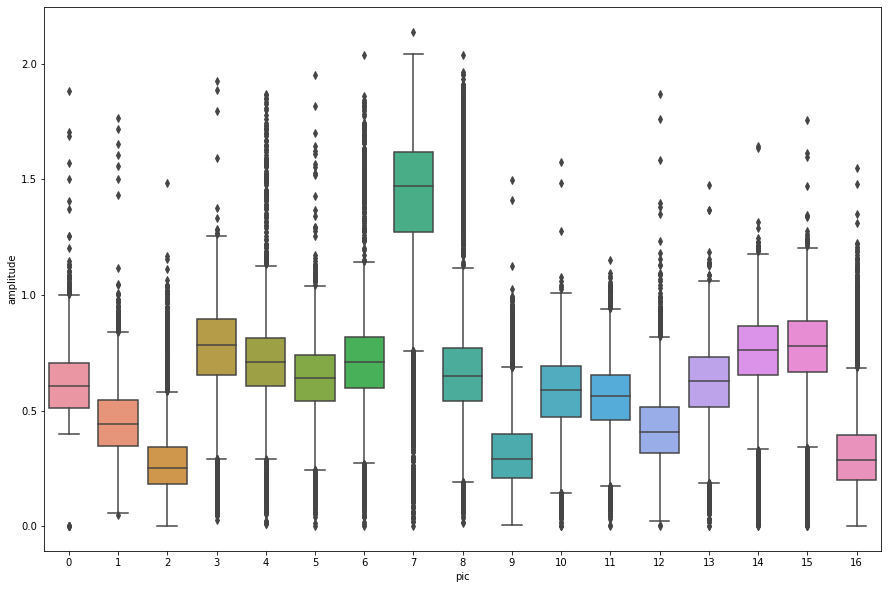

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_G.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7720


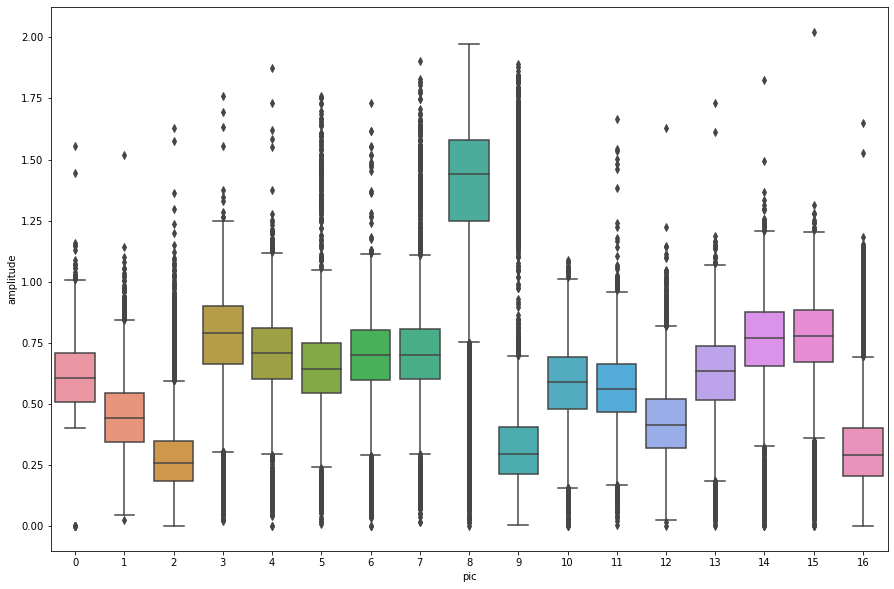

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_H.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7997


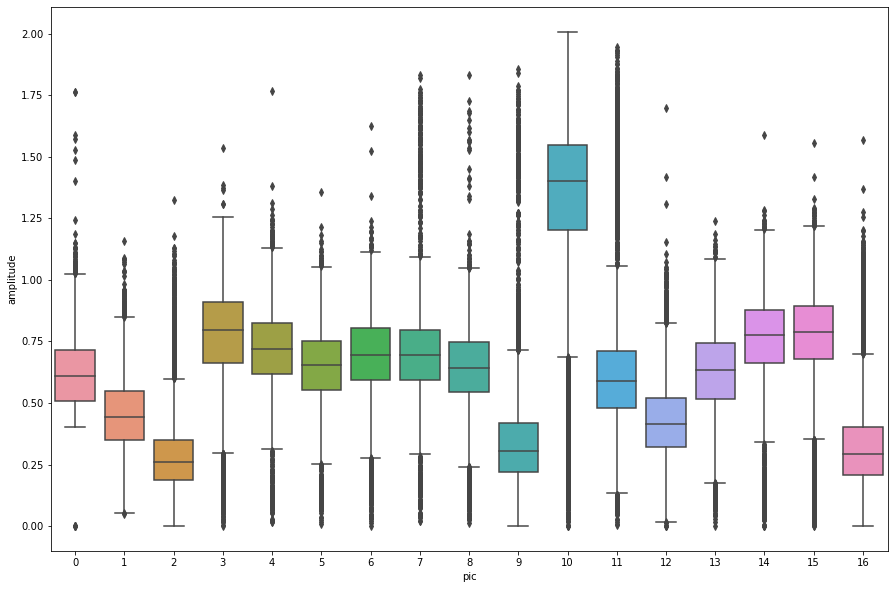

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_I.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7699


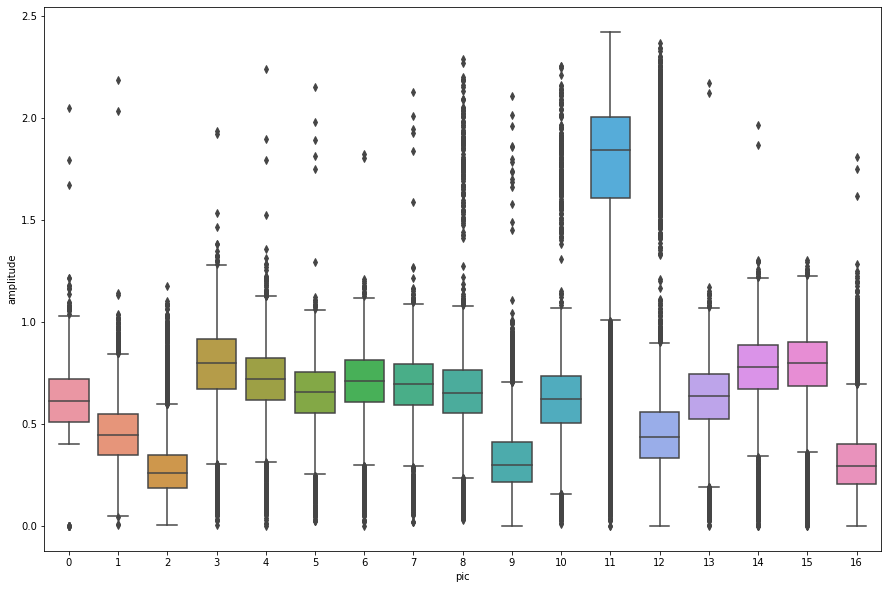

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_J.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7793


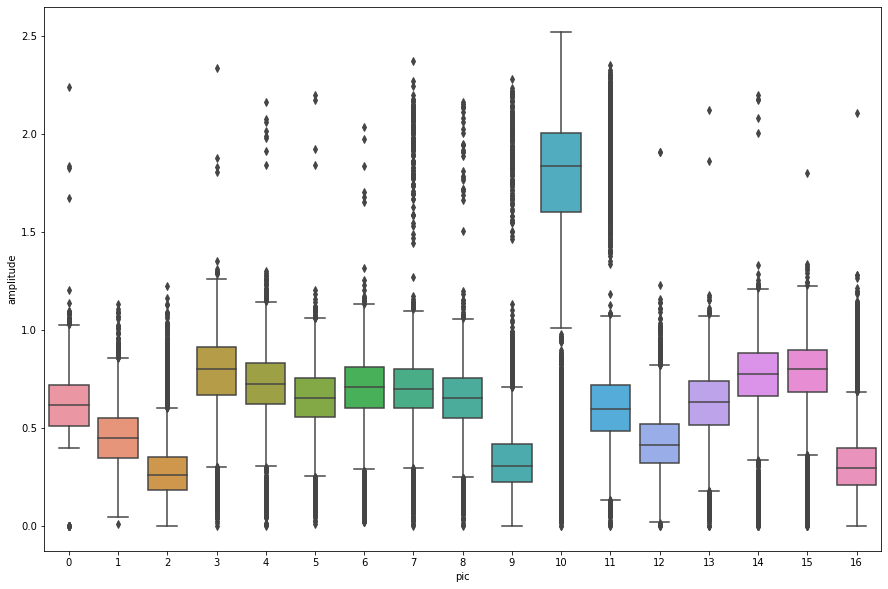

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_K.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7898


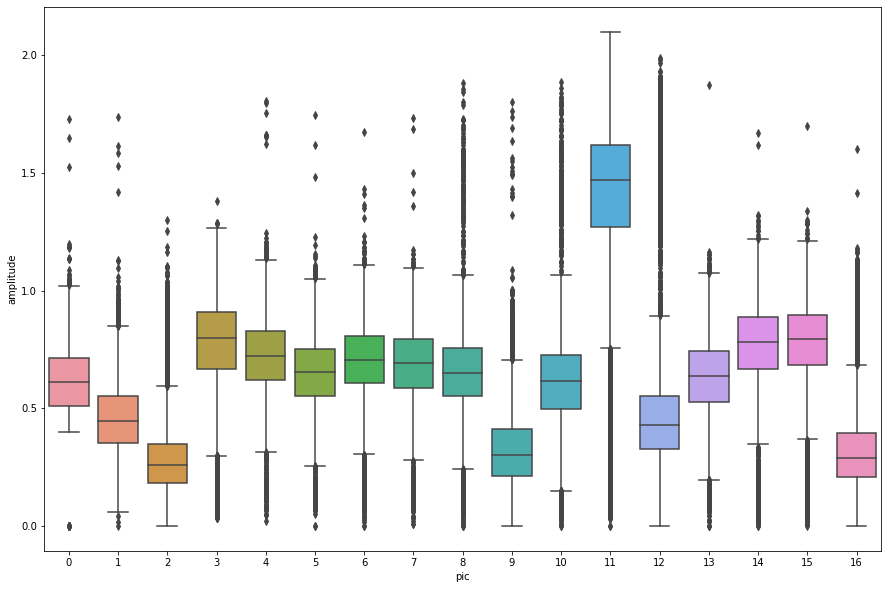

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_L.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7962


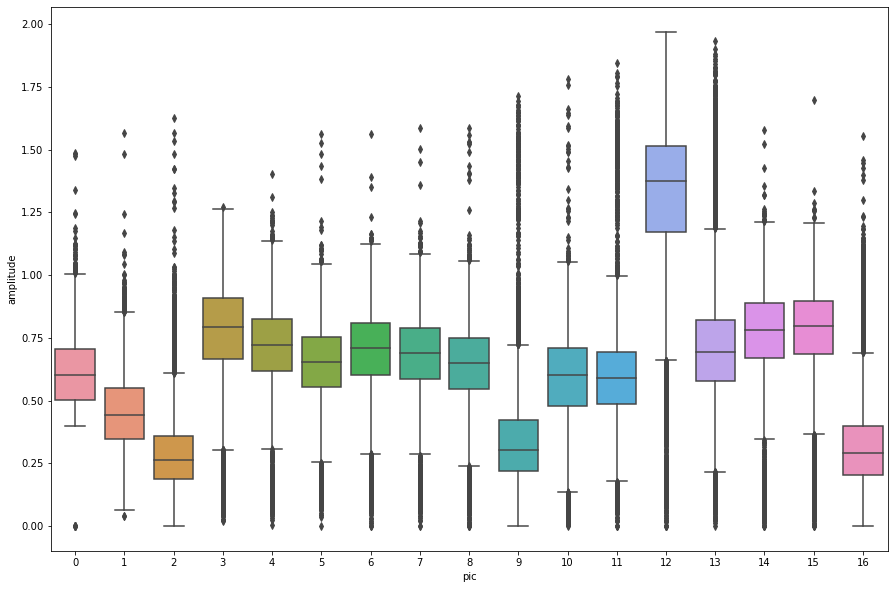

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_M.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8055


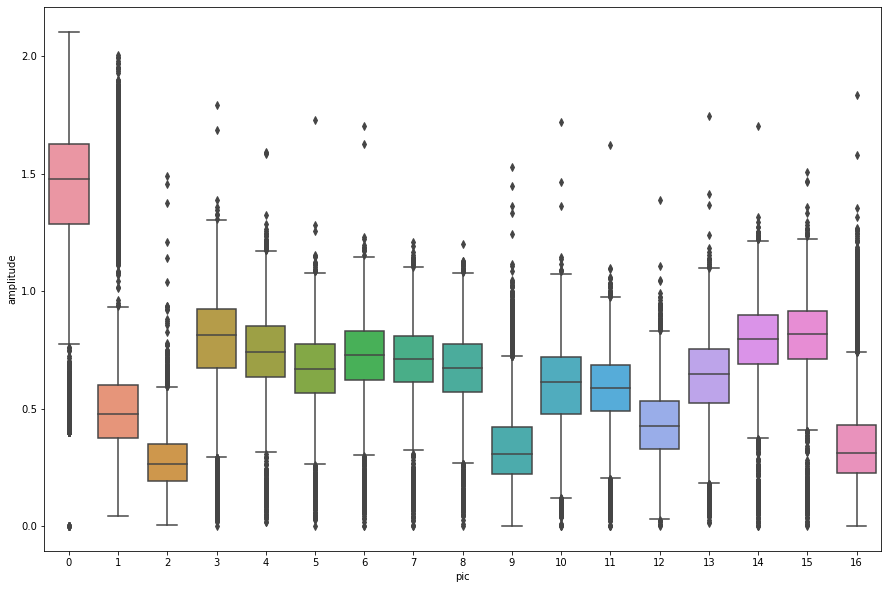

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_N.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8073


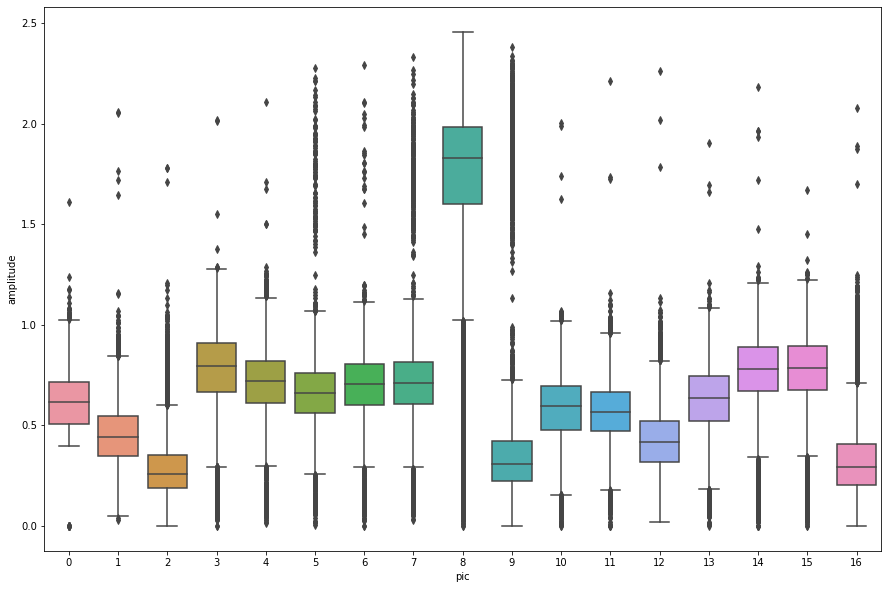

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802


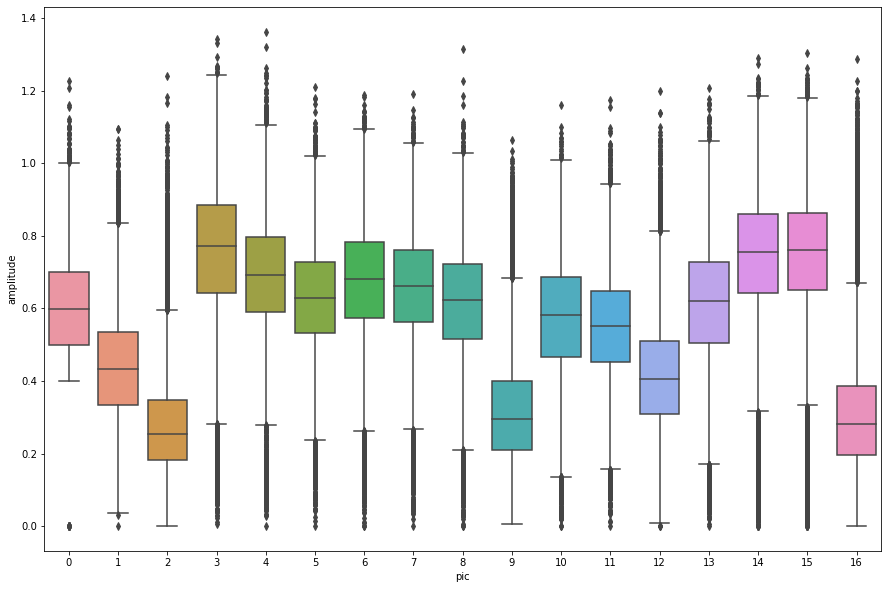

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_O.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7451


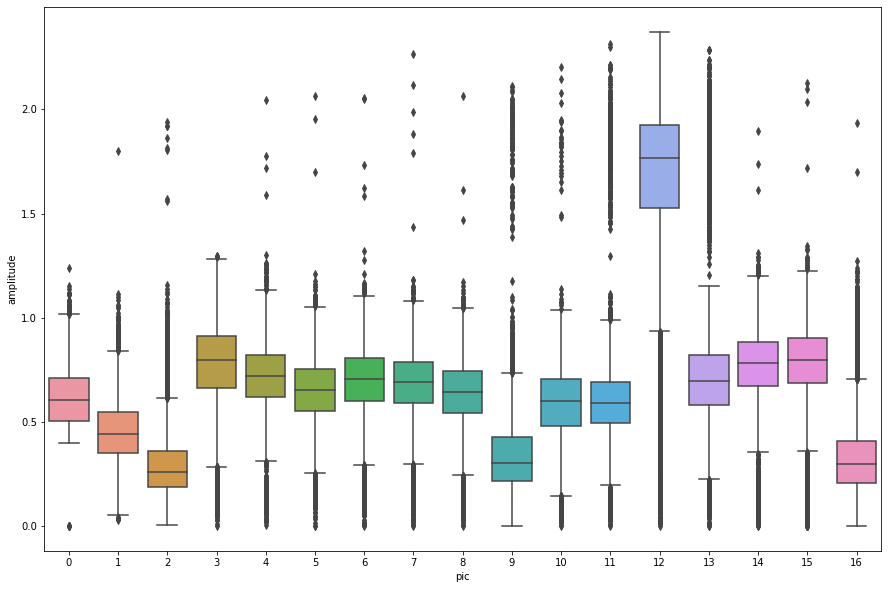

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_P.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7840


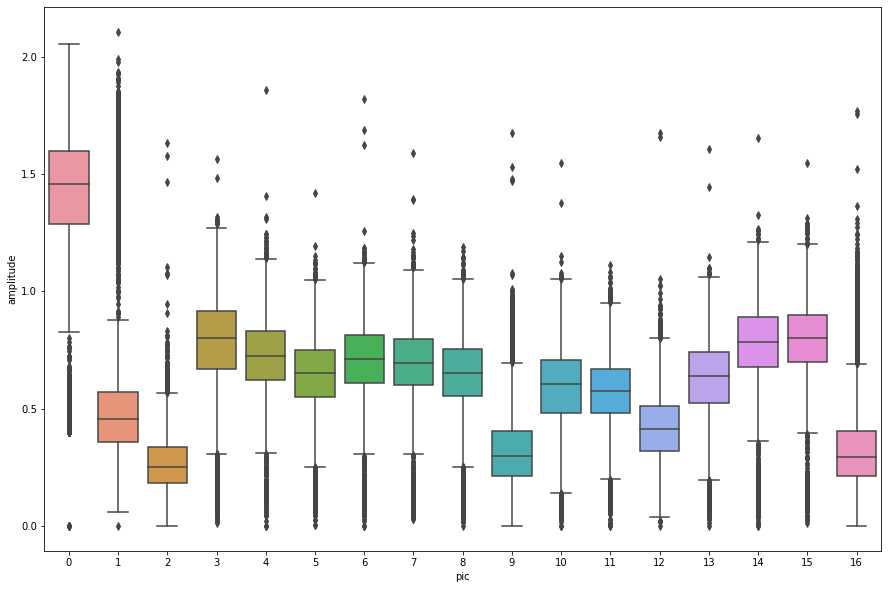

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_Q.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7577


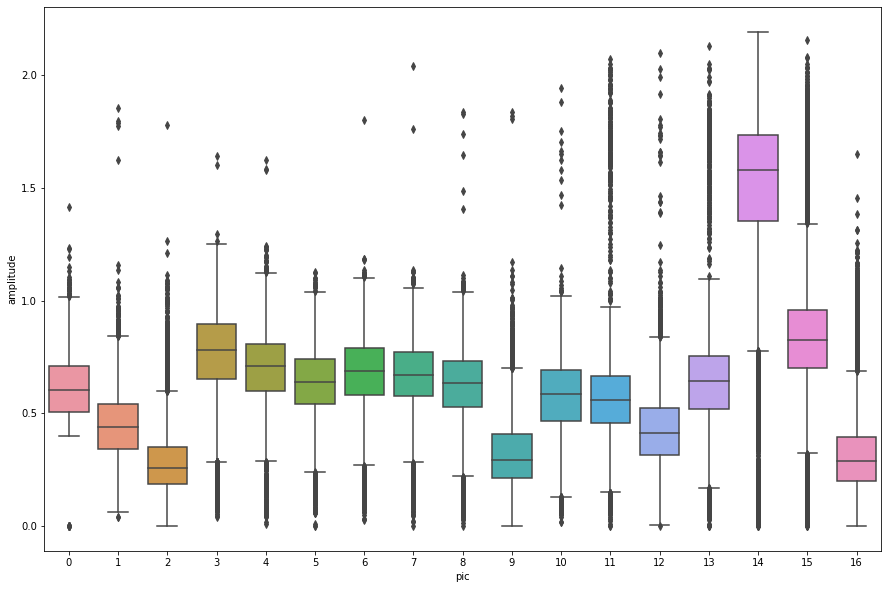

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_R.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7689


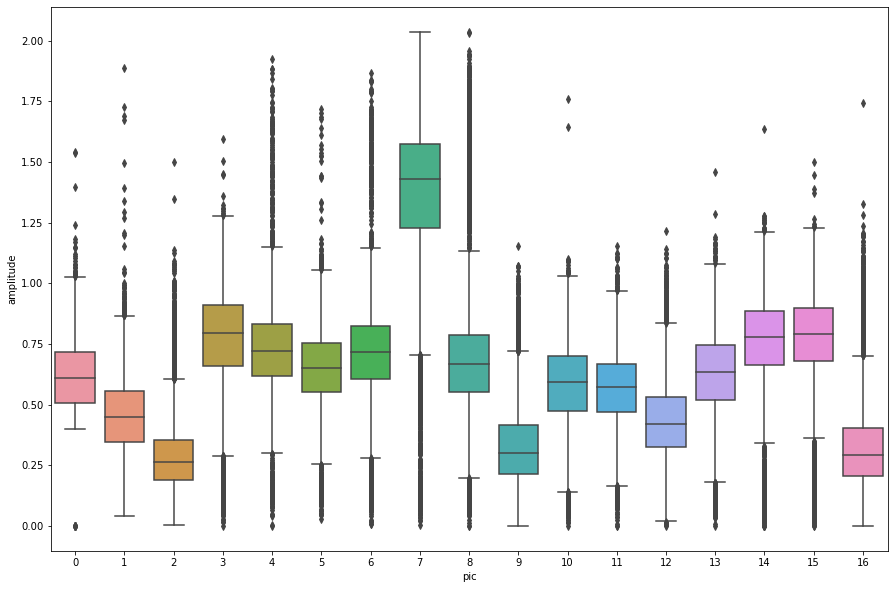

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_S.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8279


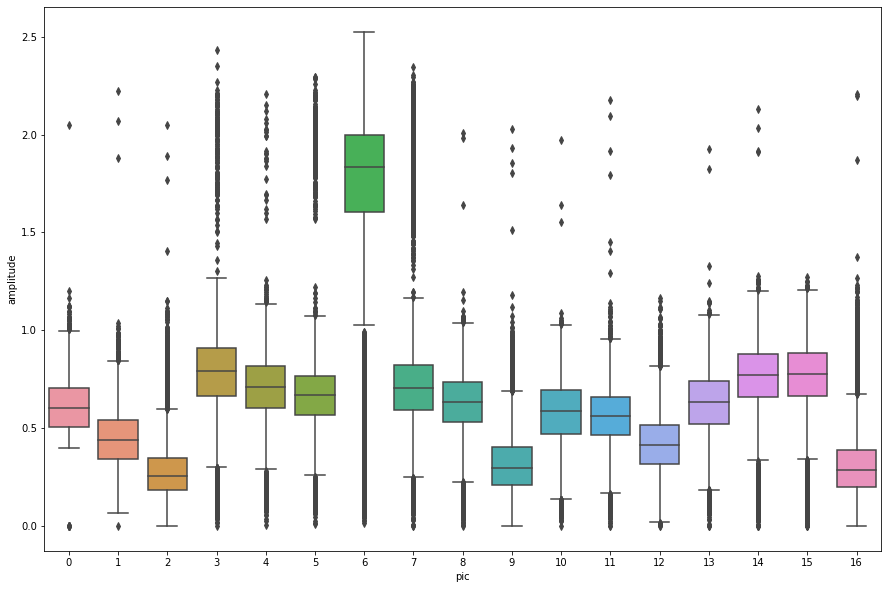

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_SHIFT.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 6964


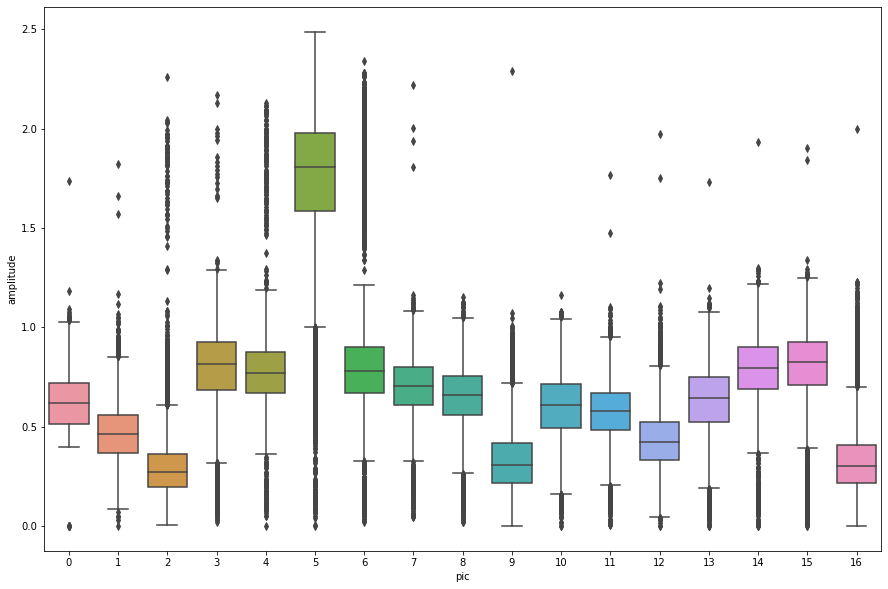

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_SPACE.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7816


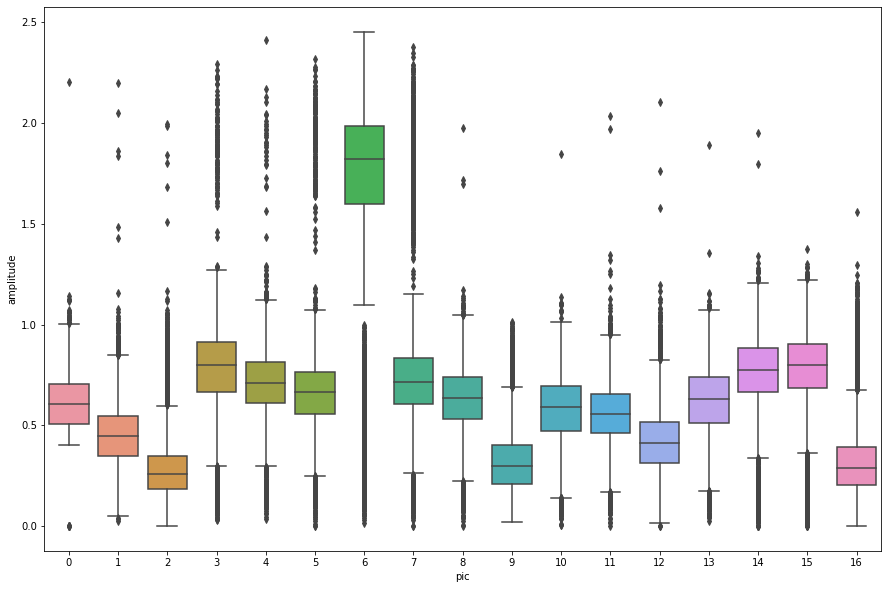

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_SUPPR.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7997


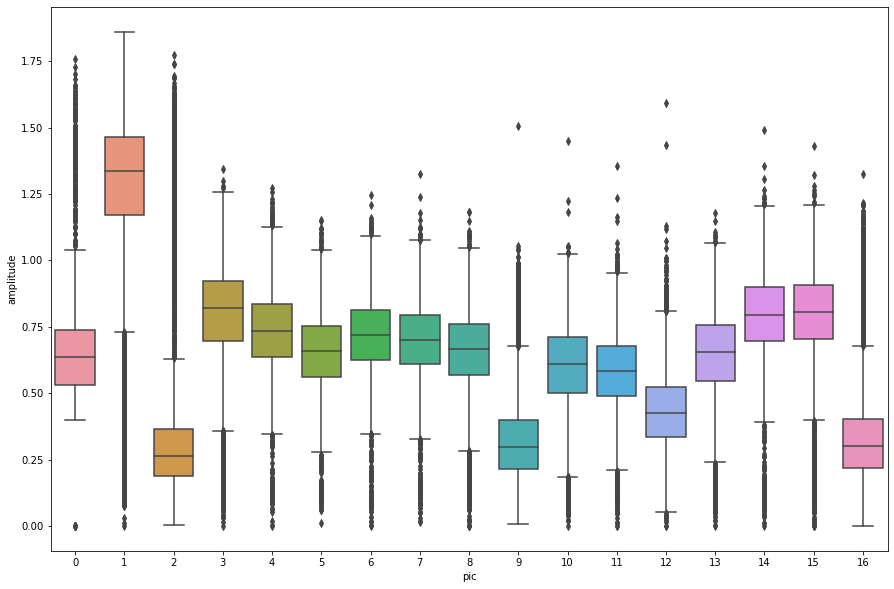

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_T.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8745


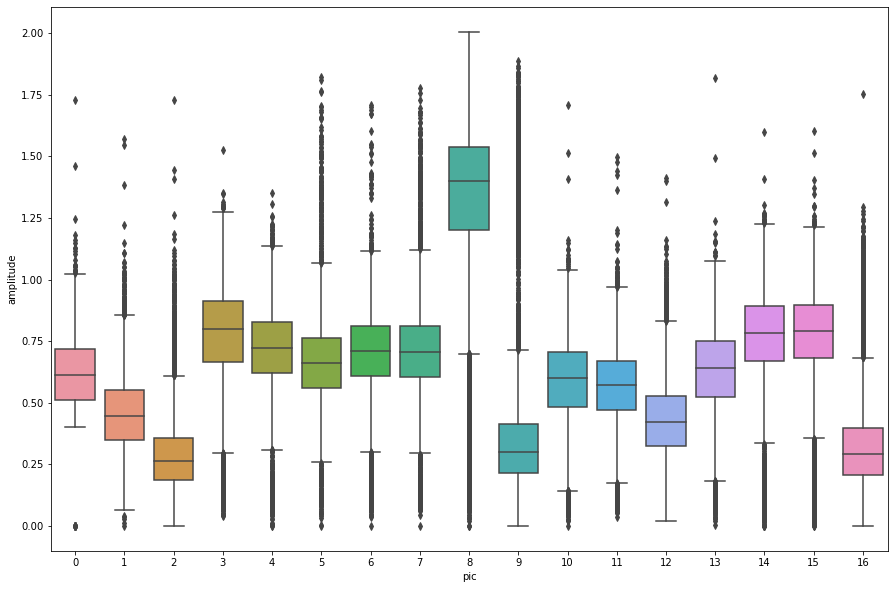

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_U.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 9344


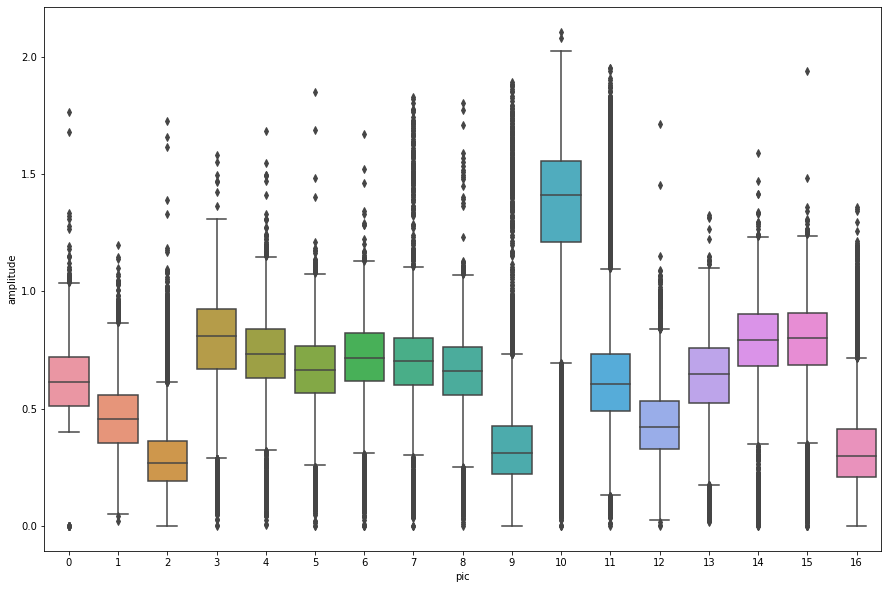

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_V.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8211


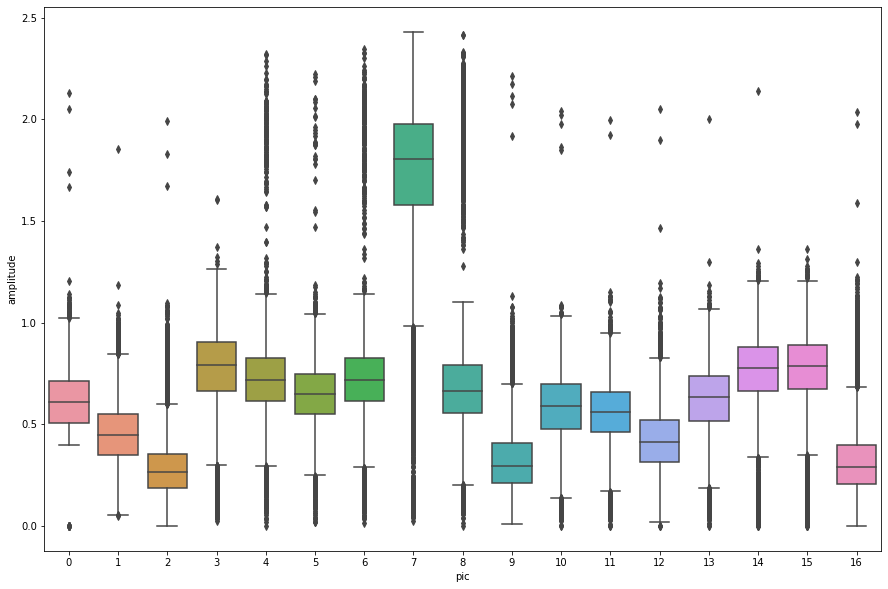

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_W.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8454


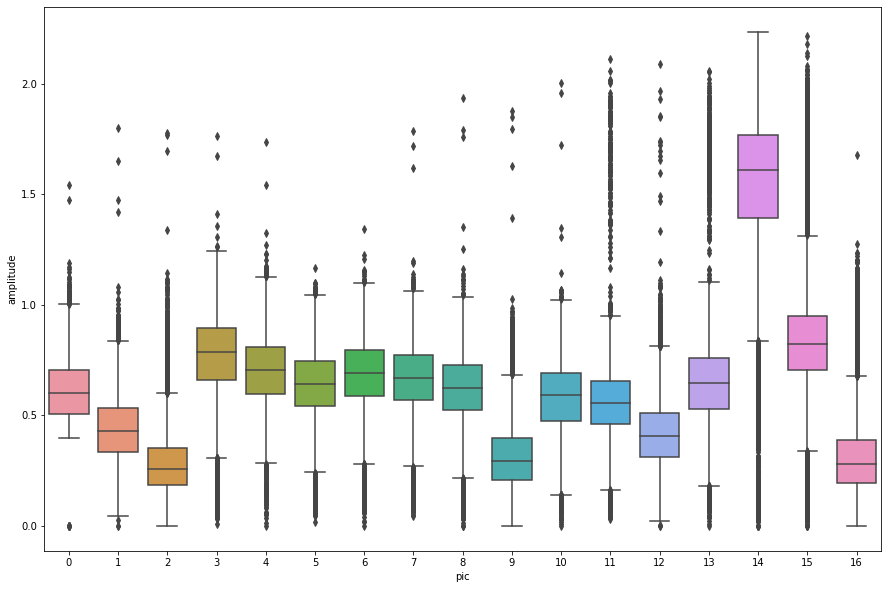

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_X.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8388


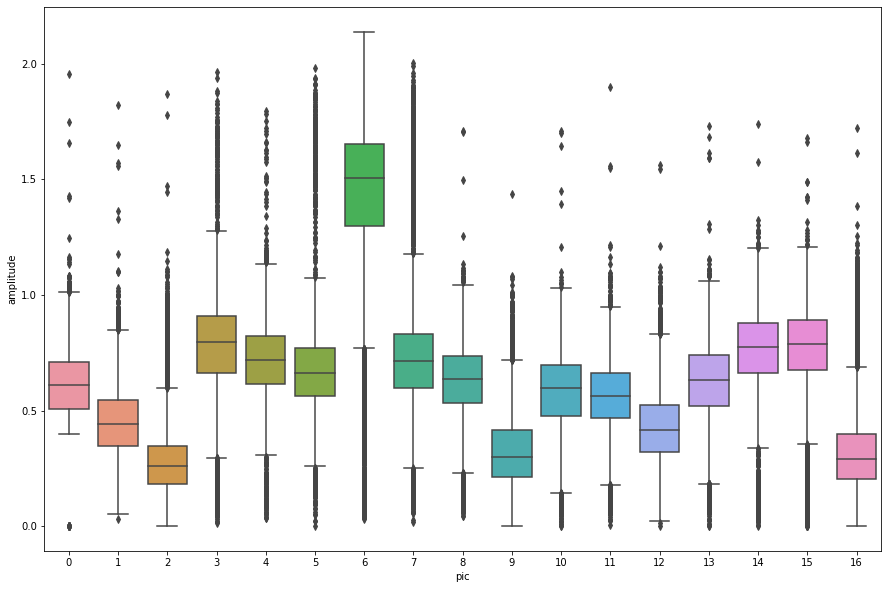

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_Y.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8095


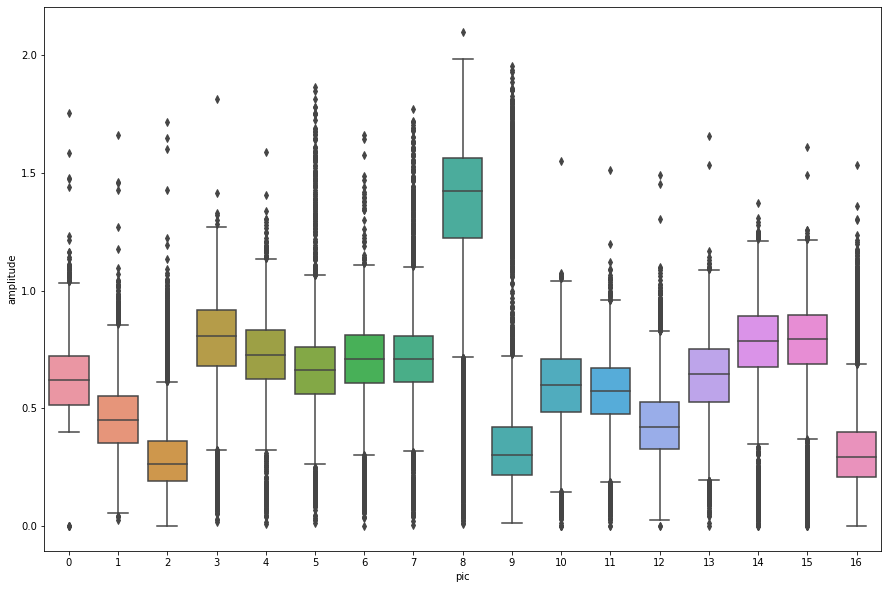

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_Z.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7713


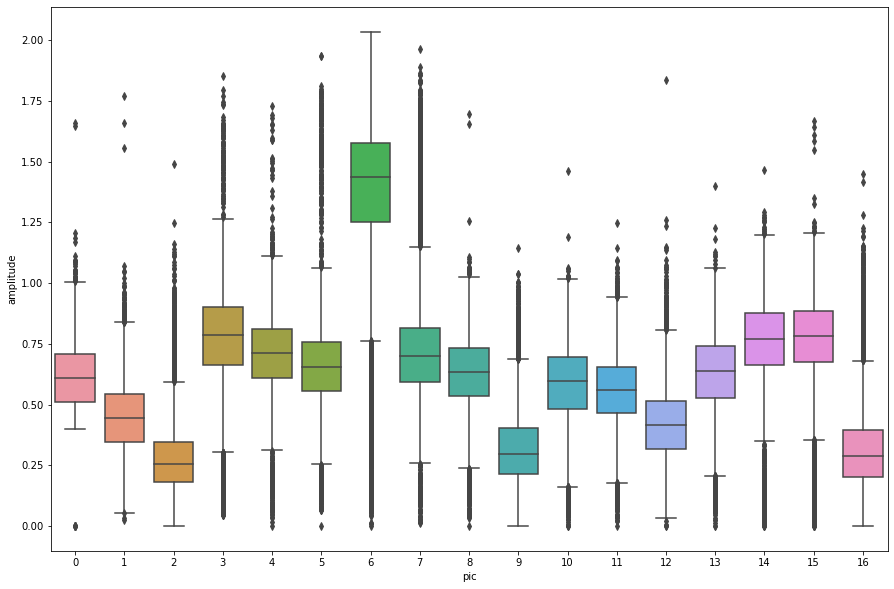

In [5]:
data= []
for i in filenames:
    tmp,info = get_pics_from_file(i)
    data.append(tmp)
    boxplot_touche(tmp)

# Essai de comprendre la proximité des signaux en fonction de la position des lettres sur le clavier

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_S.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8279


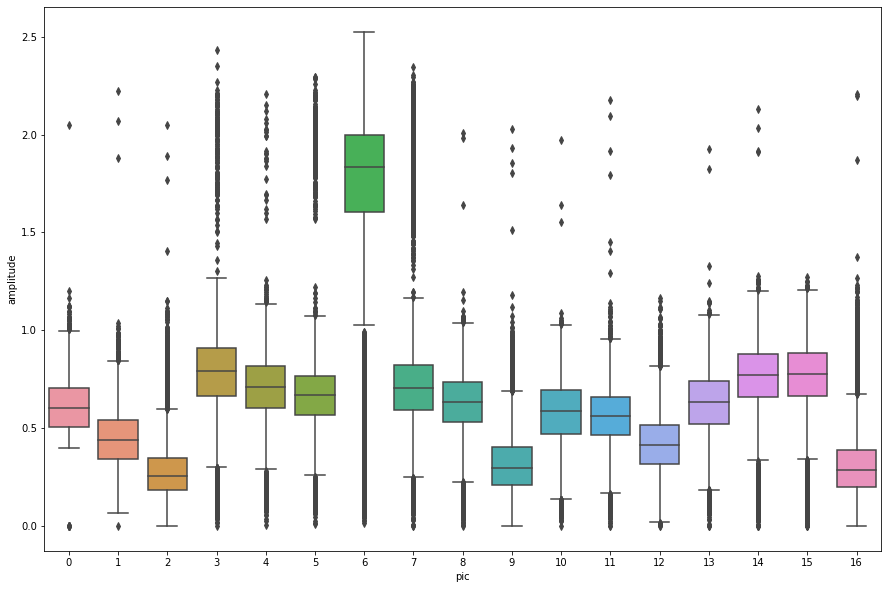

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_X.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8388


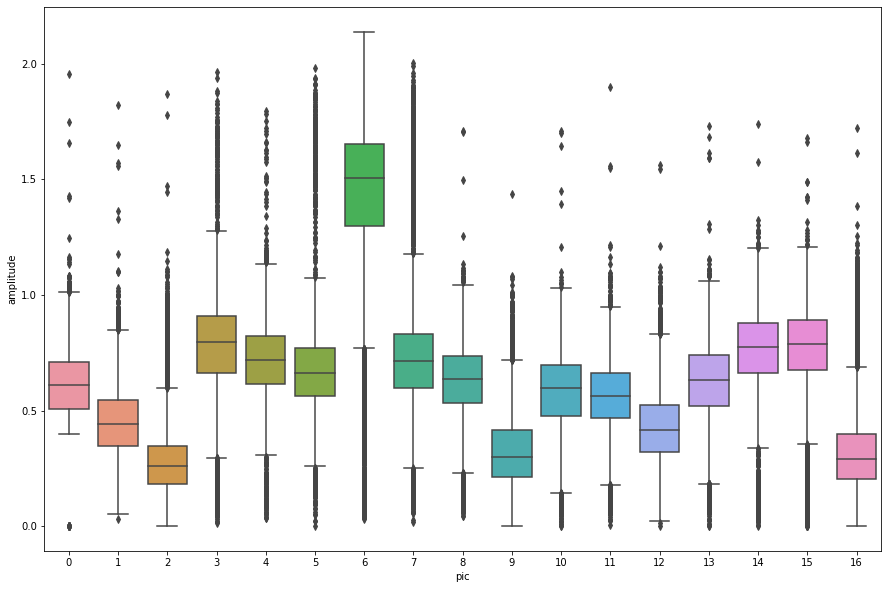

In [18]:
tmp,info = get_pics_from_file(r'C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_S.bin')
boxplot_touche(tmp)

tmp,info = get_pics_from_file(r'C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_X.bin')
boxplot_touche(tmp)

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_F.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7734


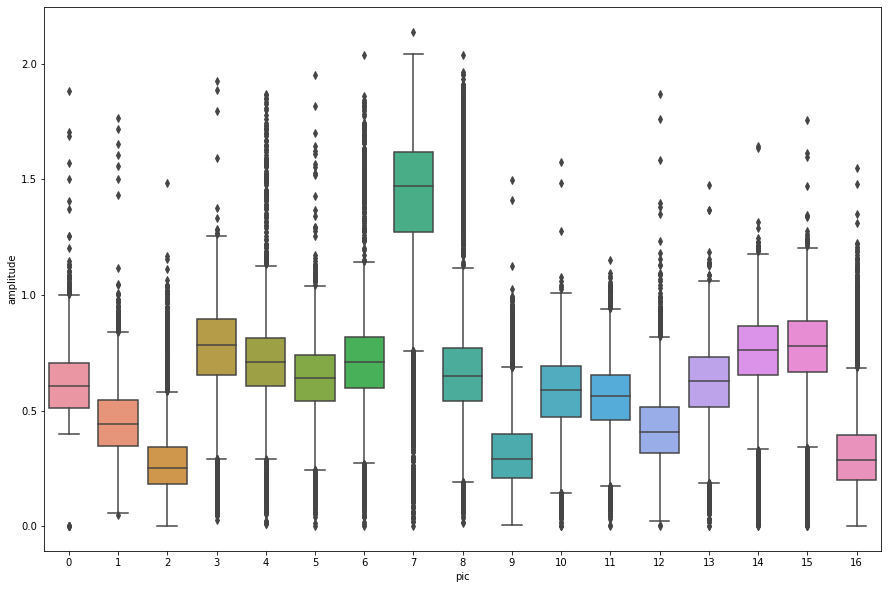

Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_C.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7777


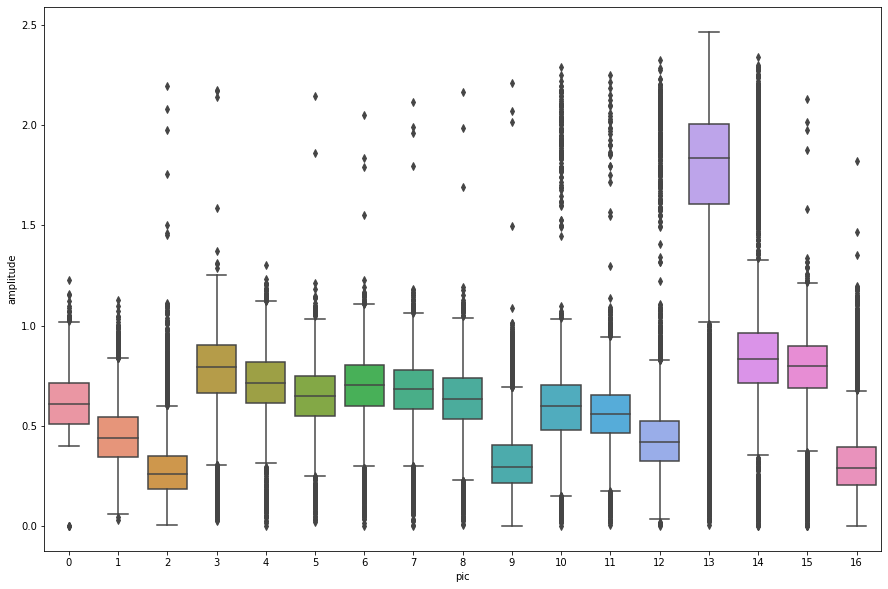

In [7]:
tmp,info = get_pics_from_file(r'C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_F.bin')
boxplot_touche(tmp)

tmp,info = get_pics_from_file(r'C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_C.bin')
boxplot_touche(tmp)

On constate que des lettres côte à côte n'auront pas toujours la même signature. Par contre, pour une lettre donnée, la lettre en dessous à droite aura une  signature  similaires dans certains cas

Exemple  : F et V, T et G, D et C.

# Fonciton de Feature Augmentation

In [8]:
def feat_augmentation(data):

    data = np.array(data)
    trimmedmean = []

    for i in range(len(np.transpose(data))):
        trimmedmean.append(tmean(data[:,i]))

    all_metrics = np.concatenate((data.mean(axis=0),
                    data.std(axis=0),
                    gmean(data),       #Compute the geometric mean along the specified axis. OK
                    kurtosis(data),
                    hmean(data),       # Calculate the harmonic mean along the specified axis. OK 
                    moment(data,2),    # Calculate the nth moment about the mean for a sample.

                    skew(data),        # Compute the sample skewness of a data set.

                    variation(data),   # Compute the coefficient of variation.

                    iqr(data,axis=0,rng=(95, 100)),   #  Compute the interquartile range of the data along the specified axis
                    iqr(data,axis=0,rng=(0, 5)),   #  Compute the interquartile range of the data along the specified axis

                   ))

    return all_metrics


# Génération du dataframe des Features explicatives

In [9]:
data = []
output = []
X = []
for i in filenames:
    print(i)
    data,_ = get_pics_from_file(i)
    output.append(feat_augmentation(data))
    data = []
    
X = pd.DataFrame(output)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
X = pd.DataFrame(X)


C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_0.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701
C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_1.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_1.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05


C:\Users\julie\.conda\envs\Julien\lib\site-packages\scipy\stats\stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Nb trames: 8390
C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_2.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_2.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8367
C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_3.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_3.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8112
C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_4.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_4.bin

C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_N.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_N.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8073
C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_NOKEY.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802
C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_O.bin
Ouverture du fichier de pics C:\Users\julie\Documents\MasterBGD_Python\zz_hackaton_armée\challenge1\Hackaton\data\\pics_O.bin
Nb pic

# Ajout d'une colonne de valeur 1 pour CTRL ENTER SUPPR NOKEY et 0 sinon

In [10]:
def name_touches(path):
    touches=[]
    files = [f for f in listdir(path) if isfile(join(path, f))] # on génère la liste des noms de fichiers
    files.remove('pics_LOGINMDP.bin')   # on enlève celui qu'on veut tester
    
    for f in files: 
        touches.append(f.replace('.bin', '').replace('pics_',''))
        
    return touches

In [11]:
X.index = name_touches(mypath)
liste = name_touches(mypath)
fff = len(X.T)
X[fff]=0

for i in liste:
    if i == 'CTRL':
        X[fff].loc[i]= 1
    if i == 'ENTER':
        X[fff].loc[i]= 1
    if i == 'SUPPR':
        X[fff].loc[i]= 1
    if i== 'NOKEY':
        X[fff].loc[i]= 1


C:\Users\julie\.conda\envs\Julien\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Génération du Y 

In [12]:
import re

files = [f for f in listdir(mypath) if isfile(join(mypath, f))] # on génère la liste des noms de fichiers
files.remove('pics_LOGINMDP.bin')   # on enlève celui qu'on veut tester

files_output = []
for f in files: 
    f = f.replace('.bin', '').replace('pics_','')
    files_output.append(f)
    
y = pd.DataFrame(files_output)
y.columns = ['label']
y

,label
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


# X à prédire (le mot de passe)

In [13]:
df_test, _ = get_pics_from_file("../data/pics_LOGINMDP.bin")
Xtest = feat_augmentation(df_test)

Xtest = np.append(Xtest,1) # ajout d'un 1 à la fin car le mdp est dans le mdp...

C:\Users\julie\.conda\envs\Julien\lib\site-packages\scipy\stats\stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Ouverture du fichier de pics ../data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102


In [14]:
Xtest


array([ 0.62550836,  0.49377909,  0.34043888,  0.747547  ,  0.74697778,
        0.82939014,  0.70505018,  0.66241547,  0.64378966,  0.33127943,
        0.57951273,  0.58094676,  0.43949062,  0.62826267,  0.76380992,
        0.74067743,  0.32866808,  0.17743974,  0.27942792,  0.27146057,
        0.23495732,  0.26044014,  0.48966561,  0.23983616,  0.16343352,
        0.23327003,  0.18228848,  0.20676697,  0.23683488,  0.22342115,
        0.23284196,  0.2448025 ,  0.21574449,  0.20357346,  0.        ,
        0.44179293,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.63602591,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 12.00446881, 11.73438793,  9.72734292,  1.2141762 ,
        6.12634576,  1.39166553, 10.95684124,  2.35010105,  9.35294898,
        9.12548038,  5.75657272, 16.41478431, 17.88535432,  9.8672242 ,
        4.70026102,  2.24253546,  3.50621372,  0.        ,  0.39

# Tentative de prédiction...

In [15]:
touches = name_touches(mypath)


In [16]:

from sklearn.base import is_classifier
import sklearn.ensemble
import sklearn.linear_model
import sklearn.tree
import sklearn.neural_network
import sklearn.svm
import sklearn.neighbors
import sklearn.gaussian_process
import sklearn.neural_network
import sklearn.semi_supervised
import sklearn.discriminant_analysis


def testingalgos(Xtr,Ytr,Xte):

    """ La fonction sklearn.base.is_classifier(estimator) permet de lister facilement toutes les librairies 
    de classification. 
    On importe tous les paquets, puis on les teste tous afin d'obtenir les scores correspondants. Ensuite,
    on met les noms d'algos et les ROC AUC scores dans un dataframe qui nous aidera à déterminer facilement 
    le meilleur algo"""

    roc_auc_scores = []
    model_names = []

    # liste de tous les packages de sklearn
    for package in [sklearn.ensemble,sklearn.linear_model,sklearn.tree,sklearn.neural_network,sklearn.svm,
                   sklearn.neighbors,sklearn.gaussian_process,sklearn.neural_network,sklearn.semi_supervised,
                   sklearn.discriminant_analysis]:
                
        for modelname in package.__all__:        # On liste tous les modèles de tous les packages
            try:
                model = getattr(package, modelname)()  # Récupère le nom du package
                if is_classifier(model)==True:         # Si l'algo est un classifieur, on essaie de fitter et prédire avec
#                     print(modelname,' is a classifier')
                    try:
                        model = getattr(package, modelname)()  # Récupérer le nom de l'algorithme
                        try: 
                            model.set_params(n_jobs=-1)        # Si possible, utiliser tous les CPU
#                             print(f'n_jobs=-1 for {model}')
                        except:
                            print(f'impossible to set n_jobs=-1 for {model}')
#                               continue
    
                        multi_output_clf = MultiOutputClassifier(model)
                        modelfit = multi_output_clf.fit(Xtr,Ytr)
                        tmp = np.array(modelfit.predict_proba(Xte.reshape(1,len(Xte))))
                        tmp = tmp.ravel()

                        pred = pd.DataFrame(np.vstack((tmp,touches)).T)
                        pred.columns = ['proba','touche']
                        pred = pred.sort_values(by='proba',ascending = False)
                        print(f'{modelname} prédit avec les scores suivants:') # créer un dataframe
                        
                        print(pred)
                        
                        del model
                        del pred
                    except:
#                         continue 
                        print('Process could not complete for ' , modelname)
            except:
                print('Process could not complete for ' , modelname)
#             continue 
                
#     output = pd.DataFrame(pred)  
    
#     return output                                                            # retourner le dataframe


In [17]:
testingalgos(Xtr=X,Ytr=y,Xte=Xtest)

Process could not complete for  BaseEnsemble
RandomForestClassifier prédit avec les scores suivants:
   proba touche
20   0.1      I
12  0.08      C
39  0.08      X
23  0.06      L
11  0.06      B
21  0.05      J
37  0.05      V
32  0.05  SHIFT
4   0.04      4
6   0.04      6
16  0.03  ENTER
13  0.03   CTRL
31  0.03      S
36  0.03      U
35  0.02      T
30  0.02      R
25  0.02      N
24  0.02      M
38  0.02      W
1   0.02      1
0   0.02      0
19  0.02      H
17  0.02      F
14  0.02      D
34  0.01  SUPPR
18  0.01      G
15  0.01      E
40  0.01      Y
5   0.01      5
7   0.01      7
33  0.01  SPACE
2    0.0      2
3    0.0      3
8    0.0      8
10   0.0      A
9    0.0      9
22   0.0      K
29   0.0      Q
28   0.0      P
27   0.0      O
26   0.0  NOKEY
41   0.0      Z
ExtraTreesClassifier prédit avec les scores suivants:
   proba touche
20  0.08      I
0   0.07      0
12  0.07      C
32  0.06  SHIFT
16  0.05  ENTER
37  0.05      V
33  0.05  SPACE
25  0.05      N
10  0.05     

C:\Users\julie\.conda\envs\Julien\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier prédit avec les scores suivants:
                     proba touche
40   9.151515560567304e-06      Y
11   8.780668348869899e-06      B
8    7.566198712270371e-06      8
28   7.489332741774595e-07      P
31   6.506143579302186e-05      S
14   5.871868681151215e-07      D
17   5.285157355672164e-05      F
35   5.227549369521191e-05      T
29  4.8837594517244686e-05      Q
25   4.656360051129821e-05      N
26   4.354337303859457e-07  NOKEY
24   3.408853283328657e-06      M
41   3.395997493034454e-05      Z
30   2.967631853276429e-07      R
7   2.8903622746601403e-08      7
22   2.757002266559592e-06      K
23  2.6817776150877294e-06      L
4   2.6424997729840394e-06      4
3    2.588086856485837e-10      3
1   2.4663199602301075e-06      1
36   2.312498844794751e-05      U
33  1.4161107552039202e-05  SPACE
2   1.0062839483338102e-05      2
16      0.8334463970507632  ENTER
10     0.05163943865278251      A
9     0.037301654552403606      9
38     0.02221981420236893      W
3

C:\Users\julie\.conda\envs\Julien\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\julie\.conda\envs\Julien\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


# Le meilleur résultat est donné par ExtraTreesClassifier. C'est le seul algorithme qui est donne des probabilités non-nulles pour toutes les touches dont nous sommes surs de l'existance dans le login/mot de passe